In [1]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os


import time

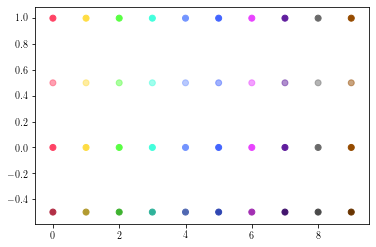

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
# Colorblind safe palettes
base = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#020202', '#abd9e9', '#74add1', '#4575b4']
#base = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
#base = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
# Rainbow palette
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

## Load results

In [20]:
directory = "synthetic_experiments/dataset_1657817138_runs:10_seed:42_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:do_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1/"
directory = "synthetic_experiments/dataset_1661334633_runs:10_seed:42_tag:I3sd_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:do_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1_standardize:1/"

In [21]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
Ns = sorted(test_cases['Ns'])

**GnIES**

In [22]:
gnies_args, gnies_results = utils.read_pickle(directory + "compiled_results_gnies_fb.pickle")
ground_truth, gnies_metrics = utils.read_pickle(directory + "metrics_gnies_fb.pickle")
gnies_lambdas = gnies_args[2]
gnies_lambdas

[0.01, 0.25, 0.5, 0.75, 1.0, 2.0]

In [23]:
gnies_metrics[metrics.success_metric].mean()

1.0

**UT-IGSP**

In [24]:
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp_gauss.pickle")
ground_truth, utigsp_metrics = utils.read_pickle(directory + "metrics_ut_igsp_gauss.pickle")
utigsp_alphas, utigsp_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_alphas, utigsp_betas

(array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]),
 array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]))

In [25]:
utigsp_metrics[metrics.success_metric].mean(axis=(0,1,2,4))

array([0.92276, 1.     , 1.     ])

**UT-IGSP+**

In [26]:
ut_igsp_plus_args, ut_igsp_plus_results = utils.read_pickle(directory + "compiled_results_ut_igsp_plus_gauss.pickle")
ground_truth, utigsp_plus_metrics = utils.read_pickle(directory + "metrics_ut_igsp_plus_gauss.pickle")
utigsp_plus_alphas, utigsp_plus_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_plus_alphas, utigsp_plus_betas

(array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]),
 array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]))

In [27]:
utigsp_plus_metrics[metrics.success_metric].mean()

0.9742533333333333

**GIES**

In [28]:
gies_args, gies_results = utils.read_pickle(directory + "compiled_results_gies.pickle")
ground_truth, gies_metrics = utils.read_pickle(directory + "metrics_gies.pickle")
gies_lambdas = gies_args[2]
gies_lambdas

[0.01, 0.25, 0.5, 0.75, 1.0, 2.0]

In [29]:
gies_metrics[metrics.success_metric].mean()

1.0

**GES**

In [34]:
ges_args, ges_results = utils.read_pickle(directory + "compiled_results_ges.pickle")
ground_truth, ges_metrics = utils.read_pickle(directory + "metrics_ges.pickle")
ges_lambdas = ges_args[2]
ges_lambdas

[0.01, 0.25, 0.5, 0.75, 1.0, 2.0]

In [35]:
ges_metrics[metrics.success_metric].mean()

1.0

## Figures

In [30]:
gnies_x = np.nanmean(gnies_metrics[metrics.type_1_structc], axis=(0,3))
gnies_y = np.nanmean(gnies_metrics[metrics.type_2_structc], axis=(0,3))

idx = list(range(len(utigsp_alphas)))
utigsp_x = np.nanmean(utigsp_metrics[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_y = np.nanmean(utigsp_metrics[metrics.type_2_structc], axis=(0,4))[idx,idx]

idx = list(range(len(utigsp_plus_alphas)))
utigsp_plus_x = np.nanmean(utigsp_plus_metrics[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_plus_y = np.nanmean(utigsp_plus_metrics[metrics.type_2_structc], axis=(0,4))[idx,idx]

gies_x = np.nanmean(gies_metrics[metrics.type_1_structc], axis=(0,3))
gies_y = np.nanmean(gies_metrics[metrics.type_2_structc], axis=(0,3))

gnies_rank_x = np.nanmean(gnies_rank_metrics[metrics.type_1_structc], axis=(0,3))
gnies_rank_y = np.nanmean(gnies_rank_metrics[metrics.type_2_structc], axis=(0,3))

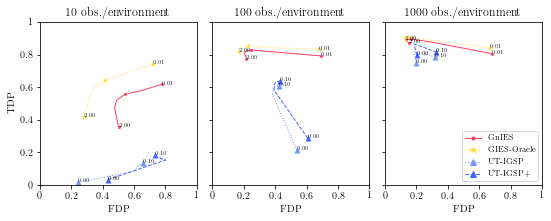

In [32]:
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'gies': '*',
          'ut_igsp': '^',
          'ut_igsp+': '^',
          'jci_pc': 's',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'gies': ':',
         'ut_igsp': ':',
         'ut_igsp+': '--',
         'jci_pc': ':',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'gies': colors[1],
         'ut_igsp': colors[4],
         'ut_igsp+': colors[5],
         'jci_pc': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'gies': 'GIES-Oracle',
               'ut_igsp': 'UT-IGSP',
               'ut_igsp+': 'UT-IGSP+',
               #'jci_pc': 'JCI-PC',         
}

def plot_metric(ax, values_x, values_y, lambdas, method, points, text):
    values_y = 1 - values_y
    ax.plot(values_x, values_y, color=color[method], linestyle=style[method], **lineopts)
    for j, l in enumerate(lambdas):
        #ax.scatter(values_x[j], values_y[j], color=color[method], marker=".", linewidth=0)
        if text and j==0 or l==lambdas[-1]:
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)
        if j in points:
            ax.scatter(values_x[j], values_y[j], color=color[method], marker=marker[method], linewidth=0)

def set_ax(ax, yticks=True):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('FDP')    
    ax.set_ylabel('TDP') if yticks else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks) if yticks else ax.set_yticklabels([])


gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(9,3))
ax = plt.gca()

for i,n in enumerate(Ns):
    plt.subplot(gs[i])
    ax = plt.gca()
    
    # Plot GnIES
    plot_metric(ax, gnies_x[:,i], gnies_y[:,i], gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], True)
        
    # Plot UT-IGSP
    plot_metric(ax, utigsp_x[:,i], utigsp_y[:,i], utigsp_alphas, 'ut_igsp', [0,len(utigsp_alphas)-1], True)    

    # Plot UT-IGSP+
    plot_metric(ax, utigsp_plus_x[:,i], utigsp_plus_y[:,i], utigsp_plus_alphas, 'ut_igsp+', [0,len(utigsp_plus_alphas)-1], True)    

    # Plot gies
    plot_metric(ax, gies_x[:,i], gies_y[:,i], gies_lambdas, 'gies', [0,2,len(gies_lambdas)-1], True)    
    
    
    set_ax(ax, yticks=i==0)
    ax.set_title("%d obs./environment" % n)

# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='lower right',
        ncol=1)


plt.savefig('figures/figure_mismatch.pdf', bbox_inches='tight')